In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Analysis of the spin polarization

We consider the analysis of the spin polarization based on the post processing of the .spin_magnetization output
of the real time calculation. 

## k = Gamma - no commutator - pulse width 40 fs

In [26]:
data_dir = 'rt_gamma_no-com/FixSymm'
last_time = '240.000'

In [27]:
# circular polarization spanning a given frequencies range
freq = 1.55
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

In [32]:
mgn_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.spin_magnetization'%(freq,freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_linear/o-freq_%s-pol_linear.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('linear pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('linear pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_reversed_circular/o-freq_%s-pol_reversed_circular.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('rev circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('rev circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)

circular pol conduction mgn 49.62381423011008 49.62381423
circular pol valence mgn 82.79241323003154 -82.79241323

linear pol conduction mgn 3.439430152997861e-05 -1.810909822e-05
linear pol valence mgn 9.717813870045586e-05 8.077631719e-05

rev circular pol conduction mgn 49.62382020008809 -49.623820200000004
rev circular pol valence mgn 82.79269340008443 82.79269339999999


Perform spin polarization analysis using ypp

In [6]:
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(freq,freq)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(freq,freq)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(freq,freq)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

In [7]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

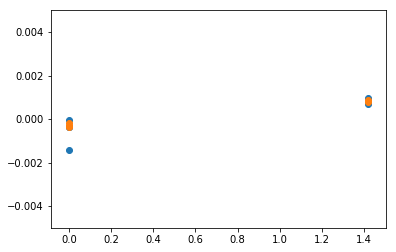

In [8]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

See how the spin polarization emerges at E=1.418

In [9]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[0, 1, 2, 3] [4, 5]


In [10]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [11]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
print(spin_pol_cond)

Total carriers 0.0033493999999999998
0.5851794351227099


Due to the degeneracy the spin polarization computed in this way is wrong.

## k = Gamma and close - no commutator - pulse width 40 fs

In [33]:
data_dir = 'rt_gamma-and-close_no-com/FixSymm'
last_time = '240.000'

In [34]:
# circular polarization spanning a given frequencies range
freq = 1.55
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

In [35]:
mgn_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.spin_magnetization'%(freq,freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_linear/o-freq_%s-pol_linear.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('linear pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('linear pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_reversed_circular/o-freq_%s-pol_reversed_circular.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('rev circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('rev circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)

circular pol conduction mgn 49.54552050021642 49.5455205
circular pol valence mgn 78.2832086000367 -78.2832086

linear pol conduction mgn 7.054417442210872e-05 -3.04228536e-05
linear pol valence mgn 2.8428794655969838e-05 1.33380709e-05

rev circular pol conduction mgn 49.54540730004109 -49.5454073
rev circular pol valence mgn 78.28317880001035 78.2831788


Perform spin polarization analysis using ypp

In [19]:
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(freq,freq)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(freq,freq)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(freq,freq)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

In [20]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

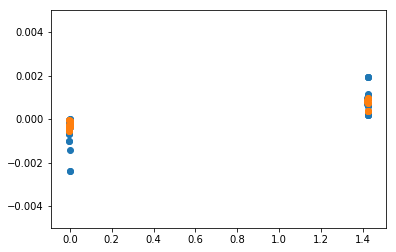

In [21]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

In this case we have two possible channels with energies 1.418 and 1.422

In [22]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418 or e == 1.422:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[24, 25, 26, 27] [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [23]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [24]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
print(spin_pol_cond)

Total carriers 0.023642
14.153624904830375


## k = 100 random (k range of 0.1 centred in Gamma) - no commutator - pulse width 100 fs

In [5]:
data_dir = 'rt_k100random_width100_no-com/FixSymm'
last_time = '600.000'

In [6]:
# circular polarization spanning a given frequencies range
freq_range = [1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

In [7]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

In [8]:
cond_pol = []
val_pol = []
tot_cond = []
for mgn,car in zip(magnetizations,carriers):
    #final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
    cond_pol.append(100.*mgn['Mc_z'][-1])
    val_pol.append(100.*mgn['Mv_z'][-1])
    #spin_pol.append(100*np.linalg.norm(final_mgn))
    tot_cond.append(car['dN_elec'][-1])

In [9]:
print(tot_cond)
print(cond_pol)
print(val_pol)

[0.000371618458, 0.0007013920113, 0.001534310053, 0.002558642067, 0.003017660929, 0.002724160673, 0.001960246358]
[30.944895700000004, 34.016785, 36.2955213, 32.9640299, 24.2076844, 14.50175643, 9.82553884]
[-42.0297742, -43.9233571, -45.3017563, -44.384056300000005, -40.935817400000005, -36.88586056, -31.5013647]


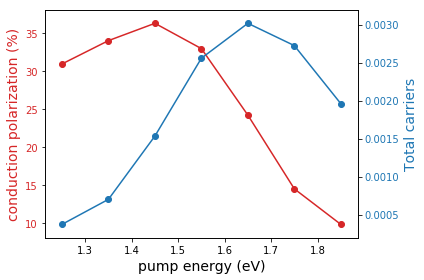

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('conduction polarization (%)', color=color,size=14)
ax1.plot(freq_range, cond_pol, color=color)
ax1.scatter(freq_range, cond_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

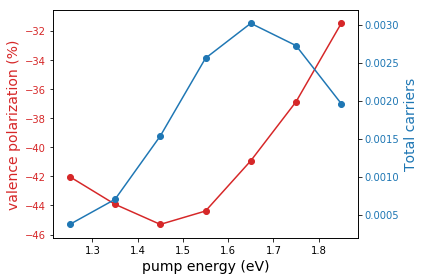

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('valence polarization (%)', color=color,size=14)
ax1.plot(freq_range, val_pol, color=color)
ax1.scatter(freq_range, val_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#################################################################################################à

## k = 8x8x8 - width = 40 fs

In [10]:
data_dir = 'rt_k8_width40/FixSymm'
last_time = '240.000'

In [11]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [12]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [13]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

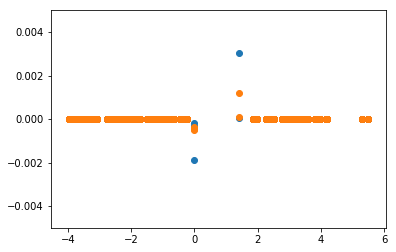

In [14]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

See how the spin polarization emerges at E=1.418

In [15]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[2044, 2045, 2046, 2047] [2048, 2049]


In [16]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [17]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.004394830000000001
40.48461487702596 22.89556926017795


The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [ ]:
cond_thrs = cond_indexes[0]

and the associated spin polarization is

In [58]:
tot_cond_up = sum(carriers_up[cond_thrs:])
tot_cond_dn = sum(carriers_dn[cond_thrs:])
tot_spin_pol_cond = (tot_cond_up-tot_cond_dn)/(tot_cond_up+tot_cond_dn)*100
tot_val_up = sum(carriers_up[0:cond_thrs])
tot_val_dn = sum(carriers_dn[0:cond_thrs])
tot_spin_pol_val = (tot_val_up-tot_val_dn)/(tot_val_up+tot_val_dn)*100
print(tot_spin_pol_cond,tot_spin_pol_val)

39.53066138564004 22.499684393721285
